## Odds and Ends: File Reading and Matplotlib

Now that we're familiar with the essentials of the Python language we're going to practice [reading files](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/WorkingWithFiles.html) and [plotting with Matplotlib](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html). 

Although these topics may be considered "odds and ends", they are common in many day-to-day applications. You'll find that spending some time up front to become familiar with these materials will save a lot of time down the road.

## Problem 1: Reading and Parsing Files
Let's pretend we were conducting a survey of favorite foods. Each participant is asked to list their favorite foods along with its category (e.g. dessert, snack, fruit). The food and category are separated by a colon, and each food-category pair is separated by a comma like so

```food: category, food: category, food: category, ... ```

The results of this survey are stored in a text file, `results.txt`, giving us a great opportunity to practice our file reading skills!

Our task is to write a function called `get_most_popular_foods` that takes a file path of survey results and returns the most common response for each food category in the form of a dictionary where the keys are the food categories and the values are the most common food of that type. If there is a tie, return the food that comes first alphabetically. Note, we don't know which food categories will be given before reading the file.

So, if we had data in the file `example.txt` with the contents below

``` granola bars: snack, shrimp: seafood
granola bars: snack
tuna: seafood ```

Our function would produce the following result
 ``` python
 >>> get_most_popular_foods('example.txt')
  {'snack': 'granola bars', 'seafood': ' shrimp'}
 ```
 
 The `collections.Counter` object will be useful for this problem. Also, the function `itertools.chain` may come in handy.
 
For reference, there is a short example input under `resources/example-survey.txt`. On this input, your function should produce the response as follows
 ``` python
>>> get_most_popular_foods('resources/example-survey.txt')
 {'dessert': 'cake', 'vegetable': 'carrots', 'fruit': 'peaches'}
```

In [32]:
def returnPairs(filepath):
   with open(filepath) as f:
       data = f.read()
       return data.split(", ")

def get_most_popular_foods(file_path):
    """Read in survey and determine the most common food of each type.

    Parameters
    ----------
    file_path : str
        Path to text file containing favorite food survey responses.

    Returns
    -------
    Dict[str, str]
        Dictionary with the key being food type and value being food.
    """
    from collections import Counter
    from itertools import chain

    with open(file_path) as f:
        # read correctly formatted lines
        entries = list(
            filter(
                lambda x: ": " in x,
                chain(*[entry.split(", ") for entry in f.read().splitlines()]),
            )
        )

    responses = {}
    for entry in entries:
        food, food_type = entry.split(": ")
        responses.setdefault(food_type, []).append(food)

    return {
        k: Counter(sorted(v)).most_common()[0][0] for (k, v) in responses.items()
    }
        
    pass

In [33]:
from bwsi_grader.python.odds_and_ends import grade_file_parser
grade_file_parser(get_most_popular_foods)

Using grader version 1.12.0

============================== ALL TESTS PASSED! ===============================
Your submission code: bwb8b7694e6fad3035e4331f2d41fa9477ec007cc11e40a8338b9390b5



## Problem 2: Plotting an Image with Matplotlib

We have an image in the file `resources/mystery-img.npy`. Read and plot the image, then answer the following for Question 2 of the homework:

__What is in this image?__



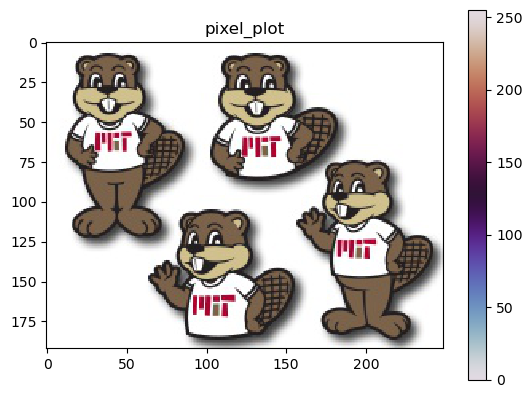

In [4]:
import matplotlib.pyplot as plt 
import numpy as np
data = np.load('resources/mystery-img.npy')
  
# creating a plot
pixel_plot = plt.figure()
    
# customizing plot
plt.title("pixel_plot")
pixel_plot = plt.imshow(
  data, cmap='twilight', interpolation='nearest')
  
plt.colorbar(pixel_plot)
  
# save a plot
plt.savefig('pixel_plot.png')
  
# show plot
plt.show(pixel_plot)